# Import necessary libraries

In [40]:
import pandas as pd 
import random
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Visualize and understand the data

In [41]:
data_path = Path("/kaggle/input/potato-diseases-datasets")

In [42]:
classes = os.listdir(data_path)
class_images = {}
for class_name in classes:
    class_images[class_name] = random.sample(os.listdir(os.path.join(data_path, class_name)), 5)

In [43]:
class_images


{'Black Scurf': ['44.jpg', '39.jpg', '21.jpg', '31.jpg', '32.jpg'],
 'Blackleg': ['41.jpg', '29.jpg', '5.jpg', '35.jpeg', '37.jpeg'],
 'Common Scab': ['59.jpg', '20.jpg', '48.jpg', '14.jpg', '57.jpg'],
 'Pink Rot': ['46.jpg', '44.jpg', '10.jpg', '32.jpg', '23.jpg'],
 'Dry Rot': ['40.jpg', '10.jpg', '51.jpg', '57.jpg', '52.jpg'],
 'Miscellaneous': ['37.jpg', '10.jpg', '28.jpg', '36.jpg', '57.jpg'],
 'Healthy Potatoes': ['22.jpg', '7.jpg', '56.jpg', '2.jpg', '23.jpg']}

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


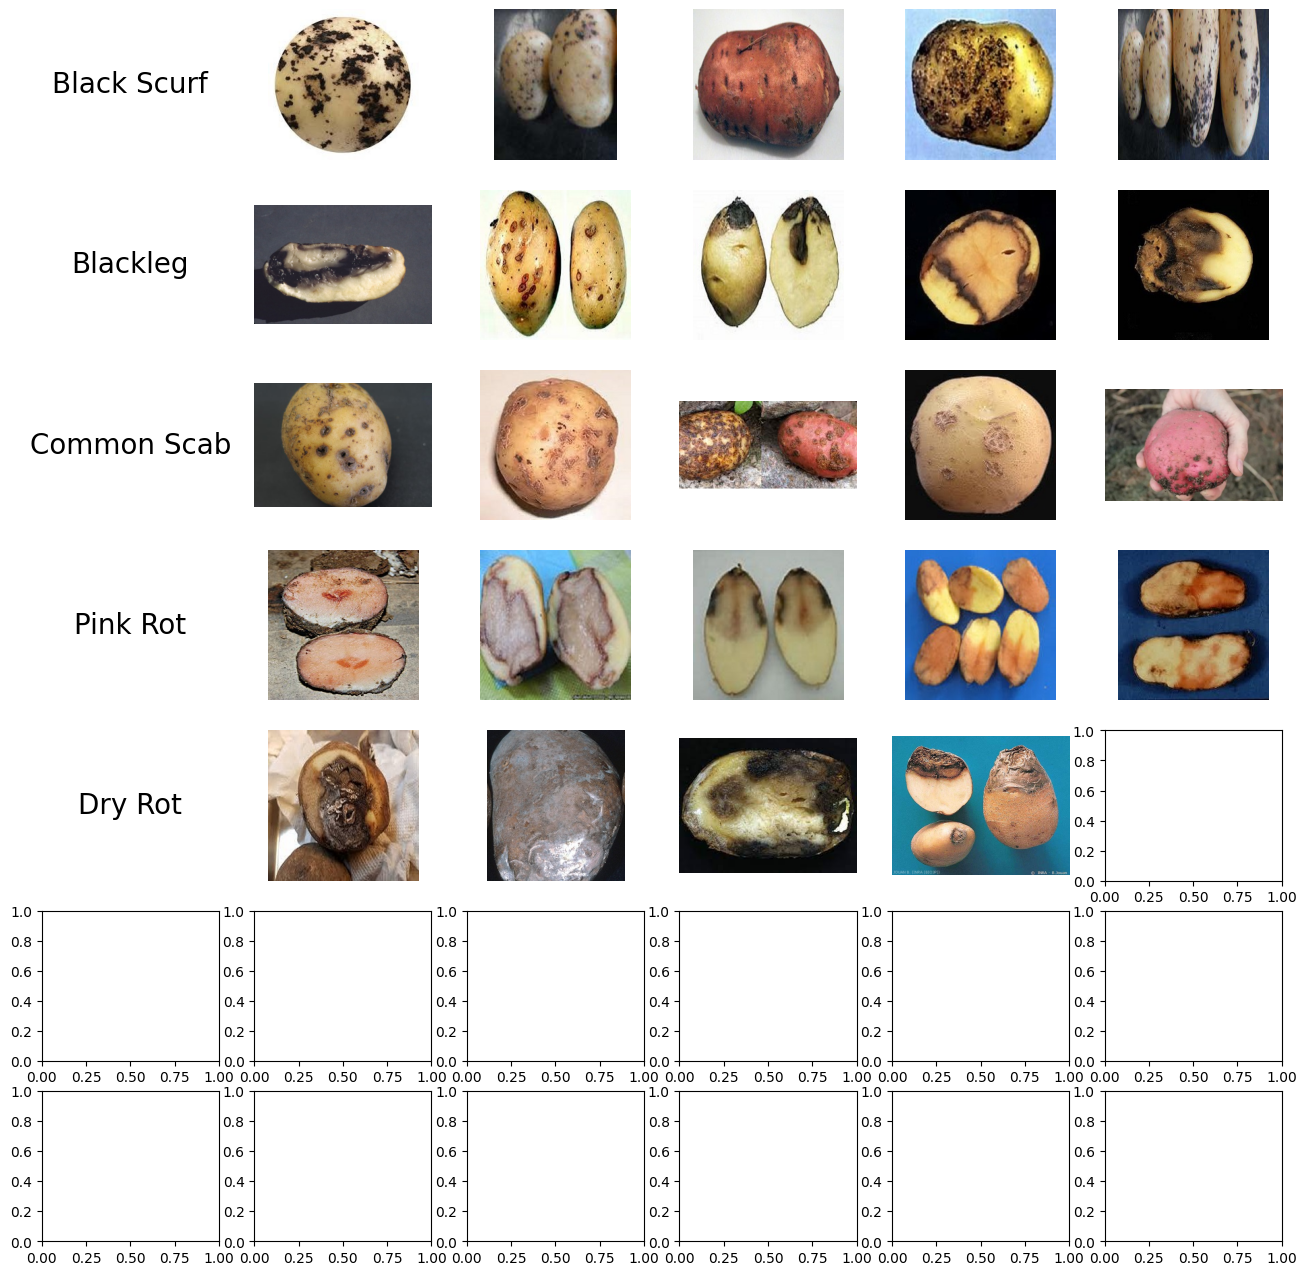

In [45]:
fig, ax = plt.subplots(7, 6, figsize=(16, 16))

for i, class_name in enumerate(class_images):
    # Display the class name before each row
    ax[i, 0].text(0.5, 0.5, class_name, fontsize=20, ha="center", va="center", transform=ax[i, 0].transAxes)
    ax[i, 0].axis(False)
    
    for j, img_file in enumerate(class_images[class_name]):
        image = cv2.imread(os.path.join(data_path, class_name, img_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax[i, j+1].imshow(image)
        ax[i, j+1].axis(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [46]:
# Check number of images in each class 
for i in os.listdir(data_path):
    length = len(os.listdir(data_path / i))
    
    print(f"{i}: {length} images")

Black Scurf: 58 images
Blackleg: 60 images
Common Scab: 62 images
Pink Rot: 57 images
Dry Rot: 60 images
Miscellaneous: 74 images
Healthy Potatoes: 80 images


In [47]:
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [48]:
data_path = Path("/kaggle/input/potato-diseases-datasets")

image_datasets = datasets.ImageFolder(root=data_path, 
                                      transform=data_transforms)

In [49]:
torch.manual_seed(42)
train_size = int(0.8 * len(image_datasets))
test_size = len(image_datasets) - train_size

train_datasets, test_datasets = torch.utils.data.random_split(dataset=image_datasets, lengths=[train_size, test_size])

In [50]:
next(iter(train_datasets))

(tensor([[[-0.0629, -0.0629, -0.0801,  ..., -0.2513, -0.2342, -0.2171],
          [-0.0801, -0.0629, -0.0629,  ..., -0.2342, -0.2171, -0.1999],
          [-0.0801, -0.0629, -0.0458,  ..., -0.1999, -0.1828, -0.1828],
          ...,
          [-0.5253, -0.5253, -0.5082,  ..., -1.1075, -1.0904, -1.0733],
          [-0.5253, -0.5253, -0.5253,  ..., -1.1075, -1.0904, -1.0904],
          [-0.5082, -0.5082, -0.5253,  ..., -1.1418, -1.1247, -1.1247]],
 
         [[ 1.0980,  1.0980,  1.1155,  ...,  0.9405,  0.9580,  0.9755],
          [ 1.0805,  1.0805,  1.0980,  ...,  0.9580,  0.9755,  0.9930],
          [ 1.0805,  1.0805,  1.0980,  ...,  0.9930,  1.0105,  1.0105],
          ...,
          [ 0.4853,  0.5028,  0.5203,  ..., -0.3550, -0.3375, -0.3200],
          [ 0.4853,  0.4853,  0.5028,  ..., -0.3901, -0.3725, -0.3725],
          [ 0.4853,  0.4853,  0.5028,  ..., -0.4251, -0.4076, -0.4076]],
 
         [[ 2.0823,  2.0823,  2.0997,  ...,  1.9428,  1.9603,  1.9777],
          [ 2.0474,  2.0474,

In [51]:
class_names = image_datasets.classes

In [52]:
torch.manual_seed(42)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_datasets,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(dataset=test_datasets,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

# Create function to create dataloader

In [53]:
def create_dataloader(data_path, transform, batch_size: int, num_workers: int):
    
    image_datasets = datasets.ImageFolder(root=data_path, transform=transform)
    
    class_names = image_datasets.classes
    
    train_size = int(0.8 * len(image_datasets))
    test_size = len(image_datasets) - train_size
    
    train_datasets, test_datasets = torch.utils.data.random_split(dataset=image_datasets, 
                                                                  lengths=[train_size, test_size])
    
    train_dataloader = DataLoader(dataset=train_datasets,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  num_workers=num_workers)

    test_dataloader = DataLoader(dataset=test_datasets,
                                 batch_size=batch_size,
                                 shuffle=False,
                                 num_workers=num_workers)
    
    return train_dataloader, test_dataloader, class_names

In [54]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Create train and test loop functions

In [55]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        # Put data to target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate and accumulate loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        
        # 4. Loss Backward
        loss.backward()
        
        # 5. Optimizer step
        optimizer.step()
        
        # Calculate and accumulate accuracy 
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)
        
    # Adjust metrics to get average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc


In [56]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    
    # Put model in eval mode
    model.eval()
    
    # Setup test_loss and test_acc values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through dataloader batches
        for batch, (X, y) in enumerate(dataloader): 
            # Send data to target device
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred_logits = model(X)
            
            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)
            
        # Adjust metric to get average loss, accuracy per batch
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        return test_loss, test_acc

In [57]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = torch.nn.CrossEntropyLoss(),
          epochs: int=5):
    
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
              }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [63]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set numper of epochs, batch size and num_workers
NUM_EPOCHS = 100
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Resnet model
weights = torchvision.models.ResNet50_Weights.DEFAULT
resnet = torchvision.models.resnet50(weights=weights).to(device)

# Resnet transform
res_transforms = weights.transforms()

# Create dataset and dataloader
train_dataloader, test_dataloader, class_names = create_dataloader(data_path,
                                                                   transform=res_transforms,
                                                                   batch_size=BATCH_SIZE,
                                                                   num_workers=NUM_WORKERS)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=resnet.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
resnet_results = train(model=resnet, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.7968 | train_acc: 0.4167 | test_loss: 1.2028 | test_acc: 0.6427
Epoch: 2 | train_loss: 0.7434 | train_acc: 0.7604 | test_loss: 1.8473 | test_acc: 0.5934
Epoch: 3 | train_loss: 0.3549 | train_acc: 0.8880 | test_loss: 1.0214 | test_acc: 0.6512
Epoch: 4 | train_loss: 0.2513 | train_acc: 0.9089 | test_loss: 1.1950 | test_acc: 0.6956
Epoch: 5 | train_loss: 0.2182 | train_acc: 0.9245 | test_loss: 1.0347 | test_acc: 0.7326
Epoch: 6 | train_loss: 0.1625 | train_acc: 0.9557 | test_loss: 1.6774 | test_acc: 0.6474
Epoch: 7 | train_loss: 0.1698 | train_acc: 0.9583 | test_loss: 1.0477 | test_acc: 0.7052
Epoch: 8 | train_loss: 0.0707 | train_acc: 0.9688 | test_loss: 0.9073 | test_acc: 0.7612
Epoch: 9 | train_loss: 0.1868 | train_acc: 0.9479 | test_loss: 1.8332 | test_acc: 0.6493
Epoch: 10 | train_loss: 0.2719 | train_acc: 0.9115 | test_loss: 1.3061 | test_acc: 0.6493
Epoch: 11 | train_loss: 0.2243 | train_acc: 0.9297 | test_loss: 1.3870 | test_acc: 0.6871
Epoch: 12 | train_l

In [66]:
from typing import List, Dict, Tuple

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

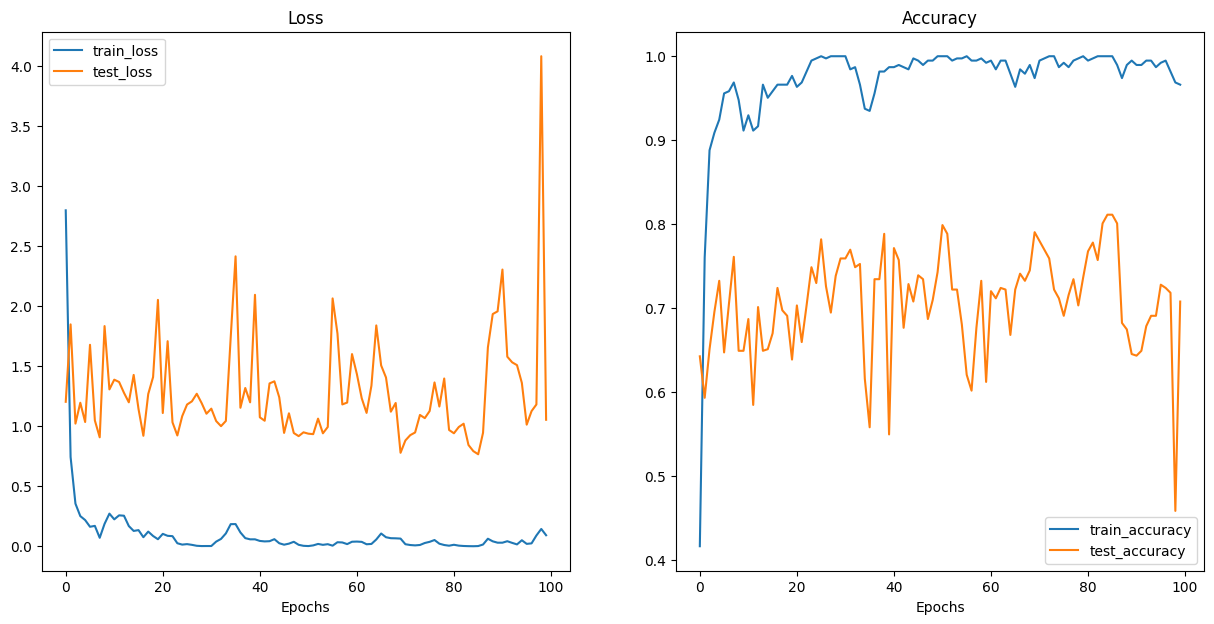

In [67]:
# plot the loss curves of resnet model
plot_loss_curves(resnet_results)